In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd

import matplotlib as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

C:\Users\Alex\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Alex\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\Alex\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df=pd.read_csv('Новая выгрузка обр.csv', encoding="cp1251")
df

,Автор,Место работы автора,Адресат,Специализация адресата,Содержание,Примечание
0,Антонова С.В.,АО «Интерфакс»,Уразов Р.Н.,Генеральный директор,возможн использован сетев издан информацион ре...,
1,Картошкин С.А.,Министерство просвещения Российской Федерации,Уразов Р.Н.,Генеральный директор,участ совещан вопрос доработк фэ предоставлен ...,
2,Цивилев С.Е.,Администрация Кемеровской области,Уразов Р.Н.,Генеральный директор,командирован саликов к. глушк д. участ заседан...,
3,Волков Г.А.,Министерство транспорта Российской Федерации,Иванюк Л.А.,Административный директор,участ чемпионат мир профессиональн мастерств с...,
4,Атанов И.В.,Ставропольский государственный аграрный универ...,Уразов Р.Н.,Генеральный директор,участ церемон открыт вузовск чемпионат 15 апр ...,
...,...,...,...,...,...,...
4887,Запруднова Е.В.,Администрация Владимирской области,Уразов Р.Н.,Генеральный директор,присутств школьник миров чемпионат казан предп...,переда митькин а. т.к. ответ е письм
4888,Черноскутова И.А.,Министерство образования и науки Российской Фе...,Уразов Р.Н.,Генеральный директор,заседан рабоч групп приоритетн проект рабоч ка...,
4889,Медведев Д.А.,Аппарат Правительства Российской Федерации,Уразов Р.Н.,Генеральный директор,протокол заседан президиум совет президент рф ...,
4890,Синюгина Т.Ю.,Министерство образования и науки РФ. Заместите...,Уразов Р.Н.,Генеральный директор,проведен 21.11.2017 заседан организацион комит...,


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4892 entries, 0 to 4891
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Автор                   4892 non-null   object
 1   Место работы автора     4891 non-null   object
 2   Адресат                 4892 non-null   object
 3   Специализация адресата  4892 non-null   object
 4   Содержание              4892 non-null   object
 5   Примечание              4892 non-null   object
dtypes: object(6)
memory usage: 229.4+ KB


Text(0, 0.5, 'Number of tweets')

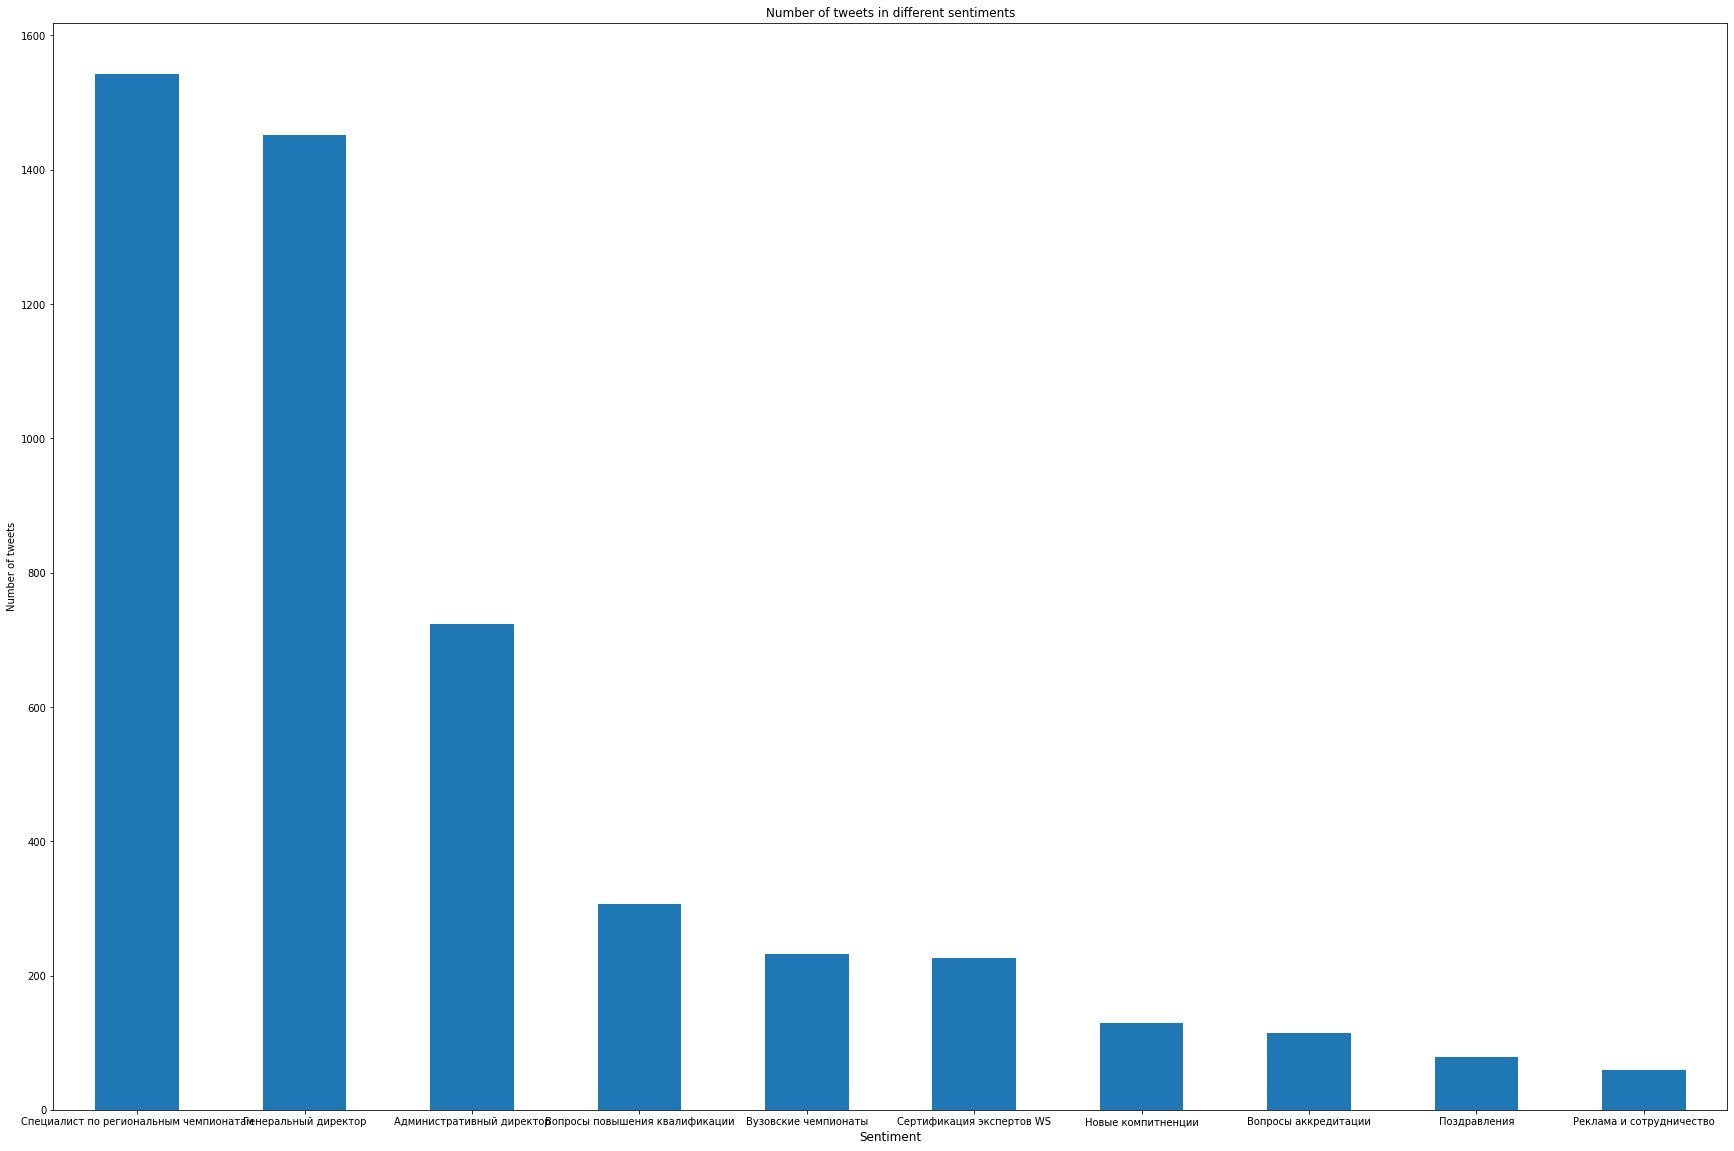

In [4]:
df['Специализация адресата'].value_counts().head(10).plot.bar(figsize=(30,20))
plt.xticks(rotation=None)
plt.title('Number of tweets in different sentiments',fontsize=12)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of tweets')

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [13]:
dfList = list(df['Содержание'])
dfList

['возможн использован сетев издан информацион ресурс спарк работ союз',
 'участ совещан вопрос доработк фэ предоставлен субсид реализац проект билет будущ 9 апр 2019 г',
 'командирован саликов к. глушк д. участ заседан оргкомитет вопрос проведен фнч кемеровск област 22 апр 2019',
 'участ чемпионат мир профессиональн мастерств стандарт ворлдскиллс WorldSkills Kazan 2019',
 'участ церемон открыт вузовск чемпионат 15 апр 2019 14.00 г. ставропол',
 'участ чемпионат мир профессиональн мастерств стандарт ворлдскиллс WorldSkills Kazan 2019',
 'направлен протокол ход реализац национальн проект демограф субъект росс',
 'согласован дат проведен вузовск чемпионат',
 'национальн чемпионат 2019',
 'проведен заседан министр образован государств-участник международн программм укреплен сист спо рамк делов программ миров чемпионат',
 'участ заочн заседан совет профквалификац машиностроен 8 апр 2019',
 '-об участ мч казан',
 'отказ рт участ ос компетенц туризм',
 'участ заочн заседан наблюдательн совет 

In [7]:
text = dfList
tokenizer = Tokenizer(num_words=10000, filters='!"#$%&()*+,./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(text)
word_indexes = tokenizer.word_index
word_indexes

{'участ': 1,
 'чемпионат': 2,
 'проведен': 3,
 '2018': 4,
 'направлен': 5,
 '2019': 6,
 'worldskills': 7,
 'ворлдскиллс': 8,
 'росс': 9,
 'год': 10,
 'стандарт': 11,
 'компетенц': 12,
 'национальн': 13,
 'программ': 14,
 'проект': 15,
 'молод': 16,
 'г': 17,
 'профессионал': 18,
 'региональн': 19,
 'заседан': 20,
 'заявк': 21,
 'профессиональн': 22,
 'област': 23,
 'отборочн': 24,
 'соревнован': 25,
 'совет': 26,
 'предоставлен': 27,
 'приглашен': 28,
 'мероприят': 29,
 'организац': 30,
 'информац': 31,
 'рф': 32,
 'рабоч': 33,
 'экзам': 34,
 'подготовк': 35,
 'участник': 36,
 'рамк': 37,
 'демонстрацион': 38,
 'вопрос': 39,
 'межвузовск': 40,
 'согласован': 41,
 'союз': 42,
 'russia': 43,
 'казан': 44,
 'мастерств': 45,
 'изменен': 46,
 'форум': 47,
 'квалификац': 48,
 'делов': 49,
 'развит': 50,
 '00': 51,
 'миров': 52,
 'предложен': 53,
 'образовательн': 54,
 'будущ': 55,
 '2018г': 56,
 'образован': 57,
 'апробац': 58,
 'работ': 59,
 'демэкзам': 60,
 'пилотн': 61,
 '2017': 62,
 'фин

In [17]:

sequences = tokenizer.texts_to_sequences(text)
print(sequences)

[[99, 320, 796, 1814, 120, 624, 1815, 59, 42], [1, 67, 39, 673, 1380, 27, 313, 90, 15, 68, 55, 434, 171, 6, 17], [488, 1816, 674, 880, 286, 1, 20, 168, 39, 3, 127, 489, 23, 206, 171, 6], [1, 2, 153, 22, 45, 11, 8, 7, 69, 6], [1, 72, 64, 165, 2, 154, 171, 6, 193, 51, 17, 1381], [1, 2, 153, 22, 45, 11, 8, 7, 69, 6], [5, 103, 377, 90, 13, 15, 978, 91, 9], [41, 159, 3, 165, 2], [13, 2, 6], [3, 20, 490, 57, 1817, 100, 1818, 1819, 378, 150, 37, 49, 14, 52, 2], [1, 207, 20, 26, 1117, 675, 277, 171, 6], [724, 1, 180, 44], [379, 881, 1, 199, 12, 388], [1, 207, 20, 360, 26, 979, 980, 1118, 39, 1119, 725, 110, 171, 6], [41, 159, 3, 165, 2], [1, 15, 68, 55, 6, 17], [1, 15, 68, 55, 6, 17], [27, 21, 981, 1120, 726, 91, 9, 271, 625, 797, 380, 626, 389, 9], [798, 140, 12, 38, 34, 11, 8, 9, 6, 10], [1, 15, 68, 55, 6, 17], [1, 15, 68, 55, 6, 17], [1, 20, 33, 70, 1121, 35, 1820, 143, 1821, 154, 171, 6, 157, 51, 121], [77, 36, 1, 199], [1, 19, 189, 1122, 1382, 160, 37, 200, 100, 550, 110, 171, 6, 229, 51,

In [23]:
content=pd.DataFrame({'Содержание':sequences})
content

,Содержание
0,"[99, 320, 796, 1814, 120, 624, 1815, 59, 42]"
1,"[1, 67, 39, 673, 1380, 27, 313, 90, 15, 68, 55..."
2,"[488, 1816, 674, 880, 286, 1, 20, 168, 39, 3, ..."
3,"[1, 2, 153, 22, 45, 11, 8, 7, 69, 6]"
4,"[1, 72, 64, 165, 2, 154, 171, 6, 193, 51, 17, ..."
...,...
4887,"[976, 136, 52, 2, 44, 659]"
4888,"[20, 33, 70, 241, 15, 33, 143, 357, 86]"
4889,"[103, 20, 382, 26, 101, 32, 369, 50, 241, 15]"
4890,"[3, 230, 110, 62, 20, 226, 148, 35, 3, 52, 2, ..."


In [185]:
df=df.drop(['Содержание'], axis = 1)
df

,Автор,Место работы автора,Адресат,Специализация адресата,Примечание
0,Антонова С.В.,АО «Интерфакс»,Уразов Р.Н.,Генеральный директор,
1,Картошкин С.А.,Министерство просвещения Российской Федерации,Уразов Р.Н.,Генеральный директор,
2,Цивилев С.Е.,Администрация Кемеровской области,Уразов Р.Н.,Генеральный директор,
3,Волков Г.А.,Министерство транспорта Российской Федерации,Иванюк Л.А.,Административный директор,
4,Атанов И.В.,Ставропольский государственный аграрный универ...,Уразов Р.Н.,Генеральный директор,
...,...,...,...,...,...
4887,Запруднова Е.В.,Администрация Владимирской области,Уразов Р.Н.,Генеральный директор,переда митькин а. т.к. ответ е письм
4888,Черноскутова И.А.,Министерство образования и науки Российской Фе...,Уразов Р.Н.,Генеральный директор,
4889,Медведев Д.А.,Аппарат Правительства Российской Федерации,Уразов Р.Н.,Генеральный директор,
4890,Синюгина Т.Ю.,Министерство образования и науки РФ. Заместите...,Уразов Р.Н.,Генеральный директор,


In [26]:
df.insert(4, "Содержание", content, True)
df

,Автор,Место работы автора,Адресат,Специализация адресата,Содержание,Содержание,Примечание
0,Антонова С.В.,АО «Интерфакс»,Уразов Р.Н.,Генеральный директор,"[99, 320, 796, 1814, 120, 624, 1815, 59, 42]",возможн использован сетев издан информацион ре...,
1,Картошкин С.А.,Министерство просвещения Российской Федерации,Уразов Р.Н.,Генеральный директор,"[1, 67, 39, 673, 1380, 27, 313, 90, 15, 68, 55...",участ совещан вопрос доработк фэ предоставлен ...,
2,Цивилев С.Е.,Администрация Кемеровской области,Уразов Р.Н.,Генеральный директор,"[488, 1816, 674, 880, 286, 1, 20, 168, 39, 3, ...",командирован саликов к. глушк д. участ заседан...,
3,Волков Г.А.,Министерство транспорта Российской Федерации,Иванюк Л.А.,Административный директор,"[1, 2, 153, 22, 45, 11, 8, 7, 69, 6]",участ чемпионат мир профессиональн мастерств с...,
4,Атанов И.В.,Ставропольский государственный аграрный универ...,Уразов Р.Н.,Генеральный директор,"[1, 72, 64, 165, 2, 154, 171, 6, 193, 51, 17, ...",участ церемон открыт вузовск чемпионат 15 апр ...,
...,...,...,...,...,...,...,...
4887,Запруднова Е.В.,Администрация Владимирской области,Уразов Р.Н.,Генеральный директор,"[976, 136, 52, 2, 44, 659]",присутств школьник миров чемпионат казан предп...,переда митькин а. т.к. ответ е письм
4888,Черноскутова И.А.,Министерство образования и науки Российской Фе...,Уразов Р.Н.,Генеральный директор,"[20, 33, 70, 241, 15, 33, 143, 357, 86]",заседан рабоч групп приоритетн проект рабоч ка...,
4889,Медведев Д.А.,Аппарат Правительства Российской Федерации,Уразов Р.Н.,Генеральный директор,"[103, 20, 382, 26, 101, 32, 369, 50, 241, 15]",протокол заседан президиум совет президент рф ...,
4890,Синюгина Т.Ю.,Министерство образования и науки РФ. Заместите...,Уразов Р.Н.,Генеральный директор,"[3, 230, 110, 62, 20, 226, 148, 35, 3, 52, 2, ...",проведен 21.11.2017 заседан организацион комит...,


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4892 entries, 0 to 4891
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Автор                   4892 non-null   object
 1   Место работы автора     4891 non-null   object
 2   Адресат                 4892 non-null   object
 3   Специализация адресата  4892 non-null   object
 4   Содержание              4892 non-null   object
 5   Примечание              4892 non-null   object
dtypes: object(6)
memory usage: 229.4+ KB


In [188]:
dfList = list(df['Примечание'])

In [189]:
text = dfList
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(text)
word_indexes = tokenizer.word_index

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4892 entries, 0 to 4891
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Автор                   4892 non-null   object
 1   Место работы автора     4891 non-null   object
 2   Адресат                 4892 non-null   object
 3   Специализация адресата  4892 non-null   object
 4   Содержание              4892 non-null   object
 5   Примечание              4892 non-null   object
dtypes: object(6)
memory usage: 229.4+ KB


In [191]:
sequences = tokenizer.texts_to_sequences(text)

In [192]:
content=pd.DataFrame({'Примечание':sequences})
content

,Примечание
0,[]
1,[]
2,[]
3,[]
4,[]
...,...
4887,"[2, 43, 196, 63, 45, 95, 40, 5]"
4888,[]
4889,[]
4890,[]


In [193]:
df=df.drop(['Примечание'], axis = 1)
df

,Автор,Место работы автора,Адресат,Специализация адресата,Содержание
0,Антонова С.В.,АО «Интерфакс»,Уразов Р.Н.,Генеральный директор,"[99, 320, 796, 1814, 120, 624, 1815, 59, 42]"
1,Картошкин С.А.,Министерство просвещения Российской Федерации,Уразов Р.Н.,Генеральный директор,"[1, 67, 39, 673, 1380, 27, 313, 90, 15, 68, 55..."
2,Цивилев С.Е.,Администрация Кемеровской области,Уразов Р.Н.,Генеральный директор,"[488, 1816, 674, 880, 286, 1, 20, 168, 39, 3, ..."
3,Волков Г.А.,Министерство транспорта Российской Федерации,Иванюк Л.А.,Административный директор,"[1, 2, 153, 22, 45, 11, 8, 7, 69, 6]"
4,Атанов И.В.,Ставропольский государственный аграрный универ...,Уразов Р.Н.,Генеральный директор,"[1, 72, 64, 165, 2, 154, 171, 6, 193, 51, 17, ..."
...,...,...,...,...,...
4887,Запруднова Е.В.,Администрация Владимирской области,Уразов Р.Н.,Генеральный директор,"[976, 136, 52, 2, 44, 659]"
4888,Черноскутова И.А.,Министерство образования и науки Российской Фе...,Уразов Р.Н.,Генеральный директор,"[20, 33, 70, 241, 15, 33, 143, 357, 86]"
4889,Медведев Д.А.,Аппарат Правительства Российской Федерации,Уразов Р.Н.,Генеральный директор,"[103, 20, 382, 26, 101, 32, 369, 50, 241, 15]"
4890,Синюгина Т.Ю.,Министерство образования и науки РФ. Заместите...,Уразов Р.Н.,Генеральный директор,"[3, 230, 110, 62, 20, 226, 148, 35, 3, 52, 2, ..."


In [194]:
df.insert(5, "Примечание", content, True)
df

,Автор,Место работы автора,Адресат,Специализация адресата,Содержание,Примечание
0,Антонова С.В.,АО «Интерфакс»,Уразов Р.Н.,Генеральный директор,"[99, 320, 796, 1814, 120, 624, 1815, 59, 42]",[]
1,Картошкин С.А.,Министерство просвещения Российской Федерации,Уразов Р.Н.,Генеральный директор,"[1, 67, 39, 673, 1380, 27, 313, 90, 15, 68, 55...",[]
2,Цивилев С.Е.,Администрация Кемеровской области,Уразов Р.Н.,Генеральный директор,"[488, 1816, 674, 880, 286, 1, 20, 168, 39, 3, ...",[]
3,Волков Г.А.,Министерство транспорта Российской Федерации,Иванюк Л.А.,Административный директор,"[1, 2, 153, 22, 45, 11, 8, 7, 69, 6]",[]
4,Атанов И.В.,Ставропольский государственный аграрный универ...,Уразов Р.Н.,Генеральный директор,"[1, 72, 64, 165, 2, 154, 171, 6, 193, 51, 17, ...",[]
...,...,...,...,...,...,...
4887,Запруднова Е.В.,Администрация Владимирской области,Уразов Р.Н.,Генеральный директор,"[976, 136, 52, 2, 44, 659]","[2, 43, 196, 63, 45, 95, 40, 5]"
4888,Черноскутова И.А.,Министерство образования и науки Российской Фе...,Уразов Р.Н.,Генеральный директор,"[20, 33, 70, 241, 15, 33, 143, 357, 86]",[]
4889,Медведев Д.А.,Аппарат Правительства Российской Федерации,Уразов Р.Н.,Генеральный директор,"[103, 20, 382, 26, 101, 32, 369, 50, 241, 15]",[]
4890,Синюгина Т.Ю.,Министерство образования и науки РФ. Заместите...,Уразов Р.Н.,Генеральный директор,"[3, 230, 110, 62, 20, 226, 148, 35, 3, 52, 2, ...",[]


In [195]:
df = df.astype(str)
df

,Автор,Место работы автора,Адресат,Специализация адресата,Содержание,Примечание
0,Антонова С.В.,АО «Интерфакс»,Уразов Р.Н.,Генеральный директор,"[99, 320, 796, 1814, 120, 624, 1815, 59, 42]",[]
1,Картошкин С.А.,Министерство просвещения Российской Федерации,Уразов Р.Н.,Генеральный директор,"[1, 67, 39, 673, 1380, 27, 313, 90, 15, 68, 55...",[]
2,Цивилев С.Е.,Администрация Кемеровской области,Уразов Р.Н.,Генеральный директор,"[488, 1816, 674, 880, 286, 1, 20, 168, 39, 3, ...",[]
3,Волков Г.А.,Министерство транспорта Российской Федерации,Иванюк Л.А.,Административный директор,"[1, 2, 153, 22, 45, 11, 8, 7, 69, 6]",[]
4,Атанов И.В.,Ставропольский государственный аграрный универ...,Уразов Р.Н.,Генеральный директор,"[1, 72, 64, 165, 2, 154, 171, 6, 193, 51, 17, ...",[]
...,...,...,...,...,...,...
4887,Запруднова Е.В.,Администрация Владимирской области,Уразов Р.Н.,Генеральный директор,"[976, 136, 52, 2, 44, 659]","[2, 43, 196, 63, 45, 95, 40, 5]"
4888,Черноскутова И.А.,Министерство образования и науки Российской Фе...,Уразов Р.Н.,Генеральный директор,"[20, 33, 70, 241, 15, 33, 143, 357, 86]",[]
4889,Медведев Д.А.,Аппарат Правительства Российской Федерации,Уразов Р.Н.,Генеральный директор,"[103, 20, 382, 26, 101, 32, 369, 50, 241, 15]",[]
4890,Синюгина Т.Ю.,Министерство образования и науки РФ. Заместите...,Уразов Р.Н.,Генеральный директор,"[3, 230, 110, 62, 20, 226, 148, 35, 3, 52, 2, ...",[]


In [196]:
df['Содержание'].apply(type)

0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
4887    <class 'str'>
4888    <class 'str'>
4889    <class 'str'>
4890    <class 'str'>
4891    <class 'str'>
Name: Содержание, Length: 4892, dtype: object

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4892 entries, 0 to 4891
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Автор                   4892 non-null   object
 1   Место работы автора     4891 non-null   object
 2   Адресат                 4892 non-null   object
 3   Специализация адресата  4892 non-null   object
 4   Содержание              4892 non-null   object
 5   Примечание              4892 non-null   object
dtypes: object(6)
memory usage: 229.4+ KB


In [28]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

import lightgbm

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [29]:
#cat_columns = [cname for cname in df.columns if df[cname].dtype == 'object']
encoder = preprocessing.LabelEncoder()
#for col in cat_columns:
#    df[col] = encoder.fit_transform(df[col])
df['Автор'] = encoder.fit_transform(df['Автор'])
df['Место работы автора'] = encoder.fit_transform(df['Место работы автора'])
df['Специализация адресата'] = encoder.fit_transform(df['Специализация адресата'])

In [30]:
df

,Автор,Место работы автора,Адресат,Специализация адресата,Содержание,Содержание,Примечание
0,74,110,Уразов Р.Н.,5,"[99, 320, 796, 1814, 120, 624, 1815, 59, 42]",возможн использован сетев издан информацион ре...,
1,651,829,Уразов Р.Н.,5,"[1, 67, 39, 673, 1380, 27, 313, 90, 15, 68, 55...",участ совещан вопрос доработк фэ предоставлен ...,
2,1646,152,Уразов Р.Н.,5,"[488, 1816, 674, 880, 286, 1, 20, 168, 39, 3, ...",командирован саликов к. глушк д. участ заседан...,
3,274,844,Иванюк Л.А.,1,"[1, 2, 153, 22, 45, 11, 8, 7, 69, 6]",участ чемпионат мир профессиональн мастерств с...,
4,99,1256,Уразов Р.Н.,5,"[1, 72, 64, 165, 2, 154, 171, 6, 193, 51, 17, ...",участ церемон открыт вузовск чемпионат 15 апр ...,
...,...,...,...,...,...,...,...
4887,540,143,Уразов Р.Н.,5,"[976, 136, 52, 2, 44, 659]",присутств школьник миров чемпионат казан предп...,переда митькин а. т.к. ответ е письм
4888,1675,793,Уразов Р.Н.,5,"[20, 33, 70, 241, 15, 33, 143, 357, 86]",заседан рабоч групп приоритетн проект рабоч ка...,
4889,963,205,Уразов Р.Н.,5,"[103, 20, 382, 26, 101, 32, 369, 50, 241, 15]",протокол заседан президиум совет президент рф ...,
4890,1387,772,Уразов Р.Н.,5,"[3, 230, 110, 62, 20, 226, 148, 35, 3, 52, 2, ...",проведен 21.11.2017 заседан организацион комит...,


In [31]:
from sklearn.model_selection import train_test_split
X = df[['Автор','Место работы автора','Содержание', 'Примечание']]
y = df["Специализация адресата"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1, stratify = df["Специализация адресата"])